In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
%matplotlib inline
sns.set_style("dark")
import warnings
warnings.filterwarnings('ignore')

# Telco Customer Churn: Data Analysis

Who is cutting their time with Telco short? 

Below is a [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn) dataset containing information critical to Telco's study of customer attrition within its company. The dataset includes:
1. Details about the customer not limited to gender, senior citizen status, and marital status
2. The services said customers are paying for, and how they are paying for services
3. Customer tenure, and Churn

In this quick data analysis exercise, I plan to identify/predict customers that are most/least likely to discontinue services provided ('Churn'), and intend to support my findings through various crosstabs and data visualizations. 

# Preparing the Dataset

In [2]:
#the dataset has 7043 rows and 21 columns
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', 21)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
df.SeniorCitizen = df.SeniorCitizen.astype('object')
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(1), o

In [6]:
#after making changes to two columns, the total charges column yielded 11 null values - which we will drop. 
df = df.dropna()

In [7]:
#On to some first glances! Customers declared three options for internet service - DSL, Fiber Optic, and None. 
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [8]:
#Customer churn - which we will delve into - applied to 1869 of 7032 customers.
df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [9]:
#1142 of 7032 customers are senior citizens (0 for no, 1 for yes)
df.SeniorCitizen.value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [10]:
#3549 of customers are male, 3483 female
df.gender.value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [11]:
#Payment Methods included electronic check, mailed chek, bank transfer and credit card
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

The dataset is now ready for some exploratory analysis. Our target feature being "Churn", we will take a look at its relationship with other features, before delving deeper into several of them. 

# Linear Relationships Between Continuous Variables

In [12]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


<Figure size 864x720 with 0 Axes>

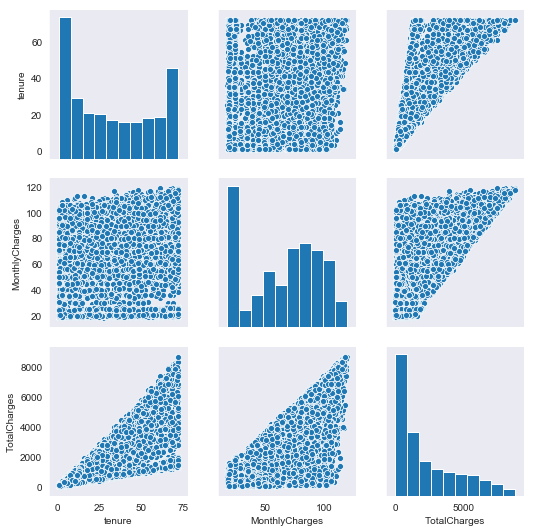

In [13]:
df_cont = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
plt.figure(figsize = (12,10))
sns.pairplot(df_cont)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text xticklabel objects>)

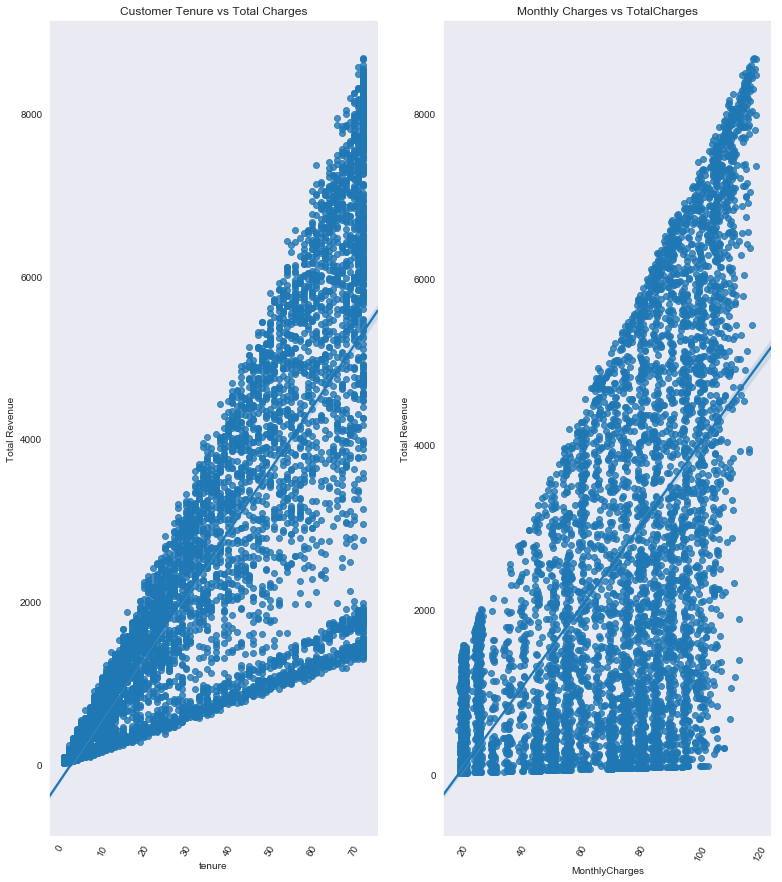

In [14]:
#there is a linear relationship between both tenure vs. total charge and monthly charge vs. total charge, as predicted
plt.figure(figsize = (20,15))
plt.subplot(131)
sns.regplot(x='tenure', y='TotalCharges', data=df_cont)
plt.ylabel('Total Revenue')
plt.title('Customer Tenure vs Total Charges')
plt.xticks(rotation=60)

plt.subplot(132)
sns.regplot(x='MonthlyCharges', y='TotalCharges', data=df_cont)
plt.ylabel('Total Revenue')
plt.title('Monthly Charges vs TotalCharges')
plt.xticks(rotation=60)

Text(0.5,0,'Churn')

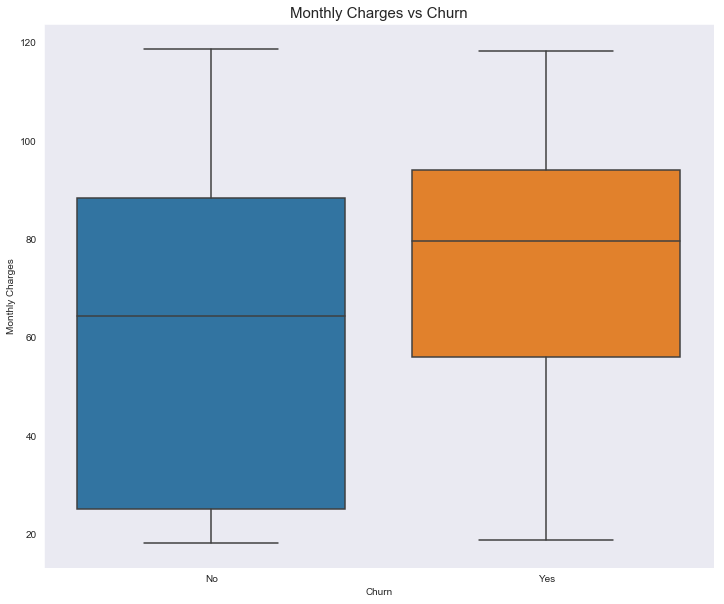

In [15]:
#boxplot suggests that those that Churn have been paying a median monthly charge of $80, compared to a little over $60
#among non-churners
plt.figure(figsize=(12,10))
ax = sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
ax.set_title('Monthly Charges vs Churn', fontsize=15)
ax.set_ylabel('Monthly Charges', fontsize=10)
ax.set_xlabel('Churn', fontsize=10)

# Churn Within Different Demographics

Text(0.5,1,'Churn Among Partners/Non-Partners')

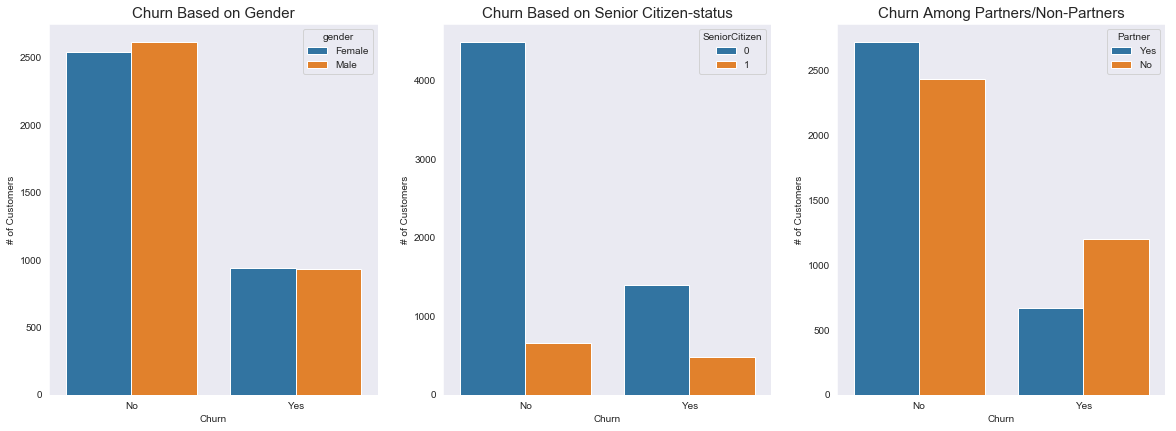

In [16]:
plt.figure(figsize=(20,15))
plt.subplot(231)
ax = sns.countplot(x='Churn', hue='gender', data=df);
ax.set_ylabel('# of Customers', fontsize = 10)
ax.set_xlabel('Churn', fontsize = 10)
ax.set_title('Churn Based on Gender', fontsize=15)

plt.subplot(232)
ax1 = sns.countplot(x='Churn', hue='SeniorCitizen', data=df);
ax1.set_ylabel('# of Customers', fontsize = 10)
ax1.set_xlabel('Churn', fontsize = 10)
ax1.set_title('Churn Based on Senior Citizen-status', fontsize=15)

plt.subplot(233)
ax1 = sns.countplot(x='Churn', hue='Partner', data=df);
ax1.set_ylabel('# of Customers', fontsize = 10)
ax1.set_xlabel('Churn', fontsize = 10)
ax1.set_title('Churn Among Partners/Non-Partners', fontsize=15)

In [17]:
#findings suggest no significant difference among different genders, greater churn among senior citizens(~41.6% Churn)
#Single customers tend to churn more than partners
pd.crosstab(df.SeniorCitizen, df.Churn)

Churn,No,Yes
SeniorCitizen,,
0,4497,1393
1,666,476


<Figure size 1440x1080 with 0 Axes>

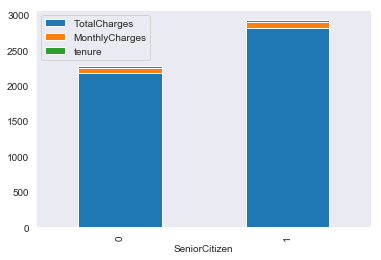

In [18]:
plt.figure(figsize=(20,15))
df.groupby('SeniorCitizen')['TotalCharges', 'MonthlyCharges', 'tenure'].mean().plot(kind='bar', stacked=True)

In [19]:
SeniorCitizen_stats = df.groupby('SeniorCitizen').mean() 
SeniorCitizen_stats

,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,,,
0,32.252292,61.885594,2181.089550
1,33.295972,79.820359,2810.465193


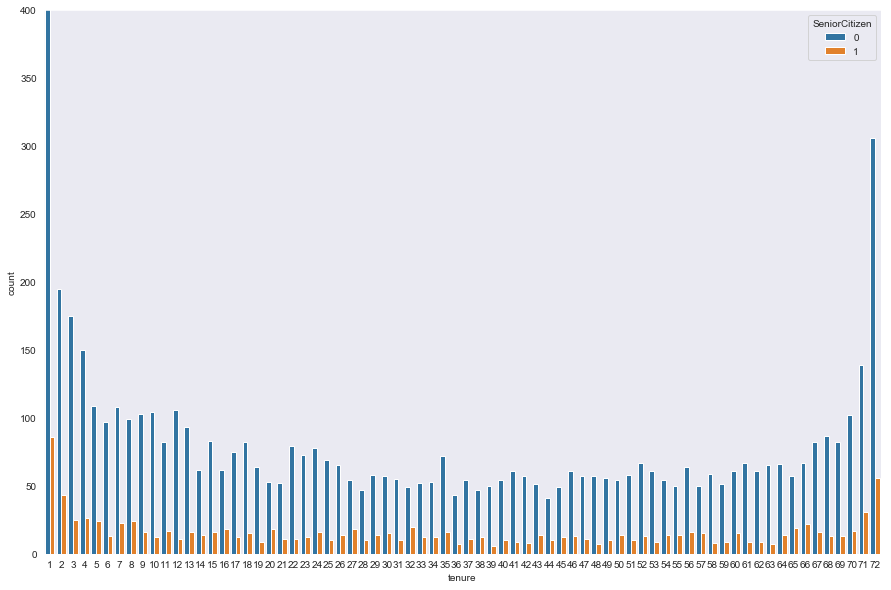

In [20]:
plt.figure(figsize=(15,10))
plt.ylim(0, 400)
sns.countplot(df['tenure'], hue=df.SeniorCitizen)

Non-Senior Citizens tend to stay longer, but Senior Citizens pay more in total charges, and monthly charges.

# Does Payment Method Influence Churn Rates?

Text(0.5,1,'Churn By Payment Method')

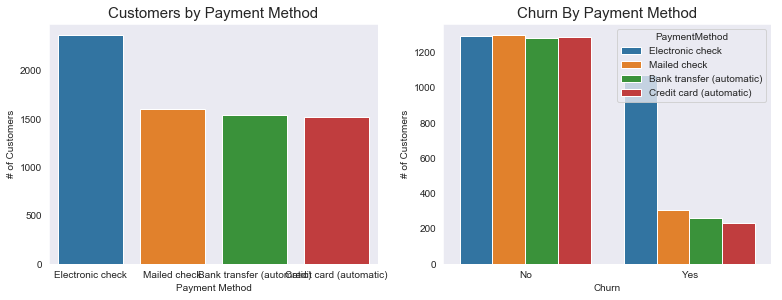

In [21]:
plt.figure(figsize=(20,15))
plt.subplot(331)
ax = sns.countplot(x='PaymentMethod', data=df);
ax.set_ylabel('# of Customers', fontsize = 10)
ax.set_xlabel('Payment Method', fontsize = 10)
ax.set_title('Customers by Payment Method', fontsize=15)

plt.subplot(332)
ax1 = sns.countplot(x='Churn', hue='PaymentMethod', data=df);
ax1.set_ylabel('# of Customers', fontsize = 10)
ax1.set_xlabel('Churn', fontsize = 10)
ax1.set_title('Churn By Payment Method', fontsize=15)

In [22]:
pd.crosstab(df.PaymentMethod, df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


In [23]:
print('Churn from Electronic Check Customers (%):{}%'.format(1071/2365*100))

Churn from Electronic Check Customers (%):45.28541226215645%


In [24]:
# Electronic Check customers seem to churn noticeably more than credit card, bank transfer or mailed check customers. 

# Internet Services and Churn  

Text(0.5,1,'Internet Services vs Churn')

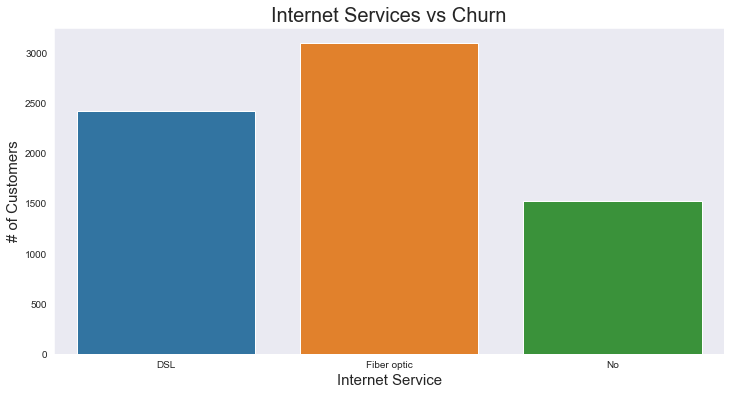

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x='InternetService', data=df)
plt.ylabel('# of Customers', fontsize = 15)
plt.xlabel('Internet Service', fontsize = 15)
plt.title('Internet Services vs Churn', fontsize = 20)

In [26]:
# 21% of Telco customers do not an internet service
df.InternetService.value_counts(normalize = True)

Fiber optic    0.440273
DSL            0.343572
No             0.216155
Name: InternetService, dtype: float64

Text(0.5,1,'Churn By Internet Service Type')

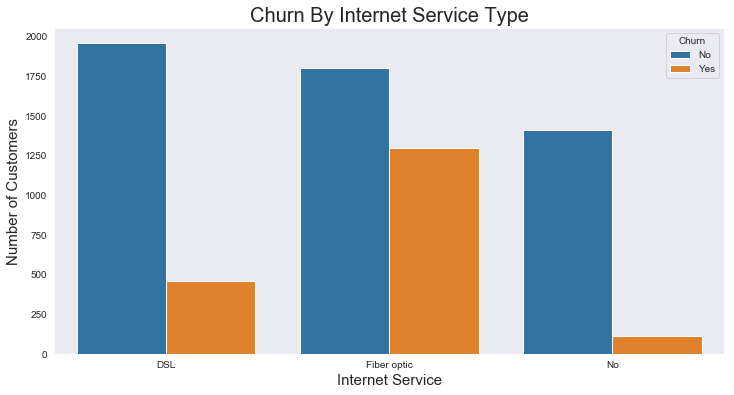

In [27]:
plt.figure(figsize=(12,6))
ax1 = sns.countplot(x='InternetService', hue='Churn', data=df);
ax1.set_ylabel('Number of Customers', fontsize = 15)
ax1.set_xlabel('Internet Service', fontsize = 15)
ax1.set_title('Churn By Internet Service Type', fontsize=20)

In [28]:
pd.crosstab(df.InternetService, df.Churn)

Churn,No,Yes
InternetService,,
DSL,1957,459
Fiber optic,1799,1297
No,1407,113


In [29]:
print('Churn from Fiber Optic User (%):{}%'.format(1297/3096*100))

Churn from Fiber Optic User (%):41.89276485788114%


In [30]:
# Fiber Optic users churn more - do monthly charges being much higher have something to do with it? 
df.groupby('InternetService')['MonthlyCharges'].mean()

InternetService
DSL            58.088017
Fiber optic    91.500129
No             21.076283
Name: MonthlyCharges, dtype: float64

# Conclusion

While there are a lot more that we could delve into, a quick analysis of Telco's customer churn data yielded the following observations: 

a) The higher the monthly charge, the higher the likelihood of churn among customers. 

b) Linear relationship between overall tenure vs. total charge and monthly vs. total charge.

c) Senior Citizens more likely to churn; single customers more likely to churn. 

d) Electronic Checks resulted in greater churn compared to other payment method. 

e) Fiber optic users could be dissatisfied by exorbitant prices or the general quality of service provided, as reflected in its higher churn rates. 

With the following observations, I would propose data modeling using either Logistic regression or random forest classifier. 